In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import random
import re
from scipy.cluster.hierarchy import ward, dendrogram
import numpy as np

In [2]:
#pip install openpyxl
#pip install wordcloud

In [3]:
#negativeTweets = pd.read_excel('./data/Tweets_Positive_CC.xlsx',sheet_name="Positive_Tweets",engine='openpyxl')
negativeTweets = pd.read_excel('./data/Tweets_Negative_CC.xlsx',sheet_name="Negative_Tweets",engine='openpyxl')

In [4]:
tweetList = []
for i in range(len(negativeTweets)):
    tweetList += [negativeTweets.iloc[i][0]]
tweetList

['RT @glbl301 : These are only a few instances, but there are many, many more. The more I looked up, the more cases there seemed to be of #Nestlé and other beverage giants like #CocaCola and #Pepsi depriving water poor communities around the world of access to clean drinking water.',
 "Mike Luckovich at the Atlanta Journal-Constitution captures the Park's proposal for changes-what Bill Stephens, the governing board's CEO, called a\xa0“reasonable, common-sense middle ground.” https://t.co/MinP6hKf2P\n#smac #stonemountain #removetheflag #cocacola #whosehertage https://t.co/CcYtRJ7djU",
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothing wrong with it.\n\n#cocacola\n#BoycottCocacola',
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothing wrong with it.\n\n#cocacola\n#BoycottCocacola',
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothing wrong with it.\n\n#cocacola\n#BoycottCocacola',
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothi

In [12]:
vectorizer = TfidfVectorizer(stop_words={'english'},max_df=0.8)
X = vectorizer.fit_transform(tweetList)
vectorizer.vocabulary_
#print the scores 
df = pd.DataFrame(X[0].T.todense(), 
                  index=vectorizer.get_feature_names(), 
                  columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)[:20]


tfidf
water        0.304960
many         0.269237
are          0.269237
more         0.260634
glbl301      0.188627
access       0.176928
instances    0.176928
nestlé       0.176928
cases        0.176928
beverage     0.176928
few          0.176928
giants       0.176928
looked       0.176928
clean        0.176928
communities  0.176928
depriving    0.176928
poor         0.176928
seemed       0.176928
of           0.169662
around       0.168627

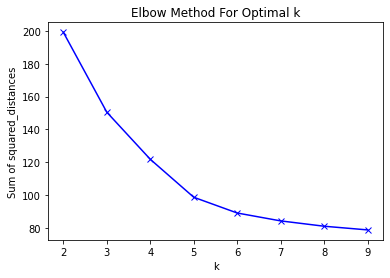

In [6]:
sumofsquareddistance = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   sumofsquareddistance.append(km.inertia_)
plt.plot(K, sumofsquareddistance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

                                                 tweet  cluster
117  RT @news_ntd : A Chinese chemist has been conv...        0
164  RT @news_ntd : A Chinese chemist has been conv...        0
163  RT @news_ntd : A Chinese chemist has been conv...        0
162  RT @news_ntd : A Chinese chemist has been conv...        0
65   RT @news_ntd : A Chinese chemist has been conv...        0
..                                                 ...      ...
31   RT @PatrioticSocia1 : It’s okay to be white.\n...        4
32   RT @PatrioticSocia1 : It’s okay to be white.\n...        4
35   It’s okay to be white.\n\nThere is nothing wro...        4
16   RT @PatrioticSocia1 : It’s okay to be white.\n...        4
33   RT @PatrioticSocia1 : It’s okay to be white.\n...        4

[507 rows x 2 columns]


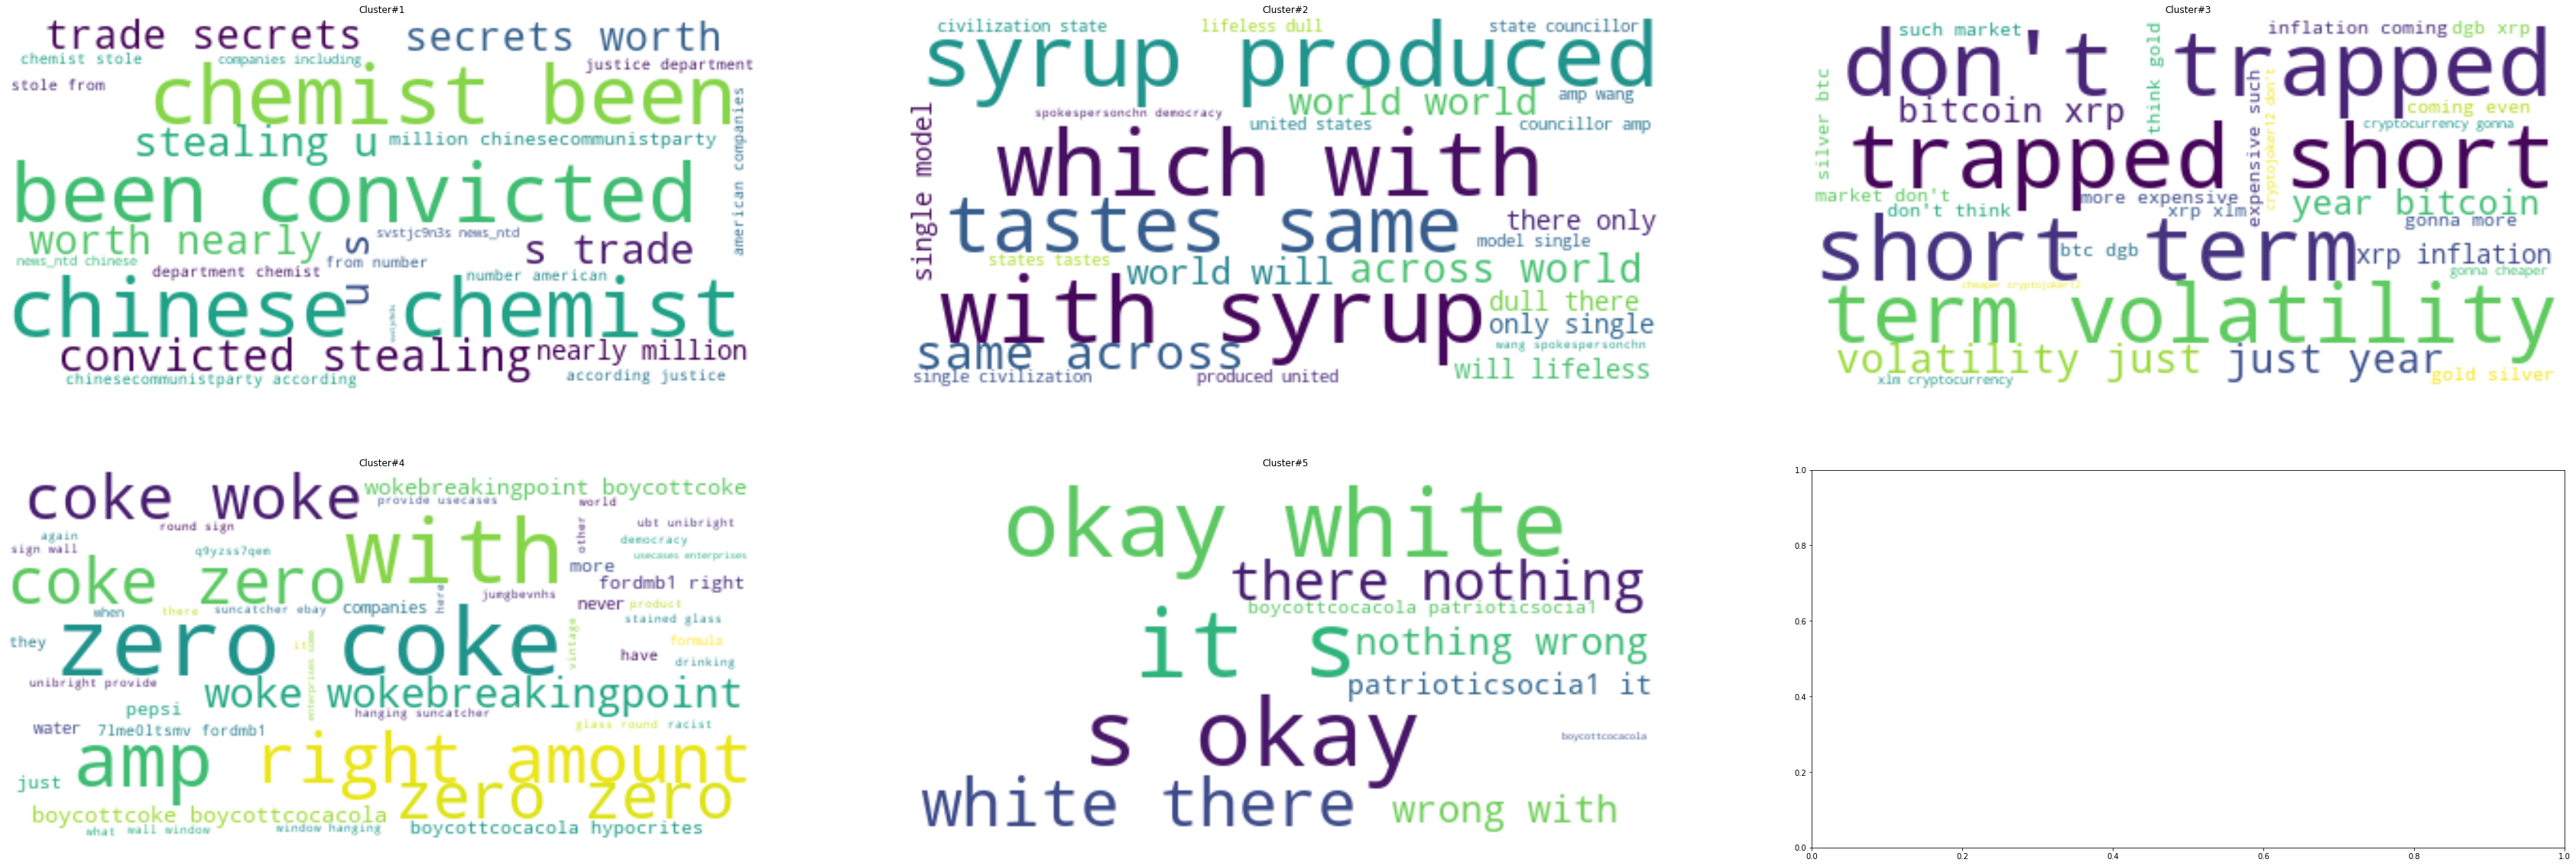

In [7]:
random.seed(22)
idealK = 5
model = KMeans(n_clusters=idealK, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
tweetClusters=pd.DataFrame(list(zip(tweetList,labels)),columns=['tweet','cluster'])
print(tweetClusters.sort_values(by=['cluster']))
tweetClusters.groupby('cluster').count()

#Plotting
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(60,20))
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
#   print("\n printing S",s)
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that','cocacola','coca','cola']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    #print('Cluster: {}'.format(k))
    #print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    #print(tweets.to_string(index=False))
    plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()

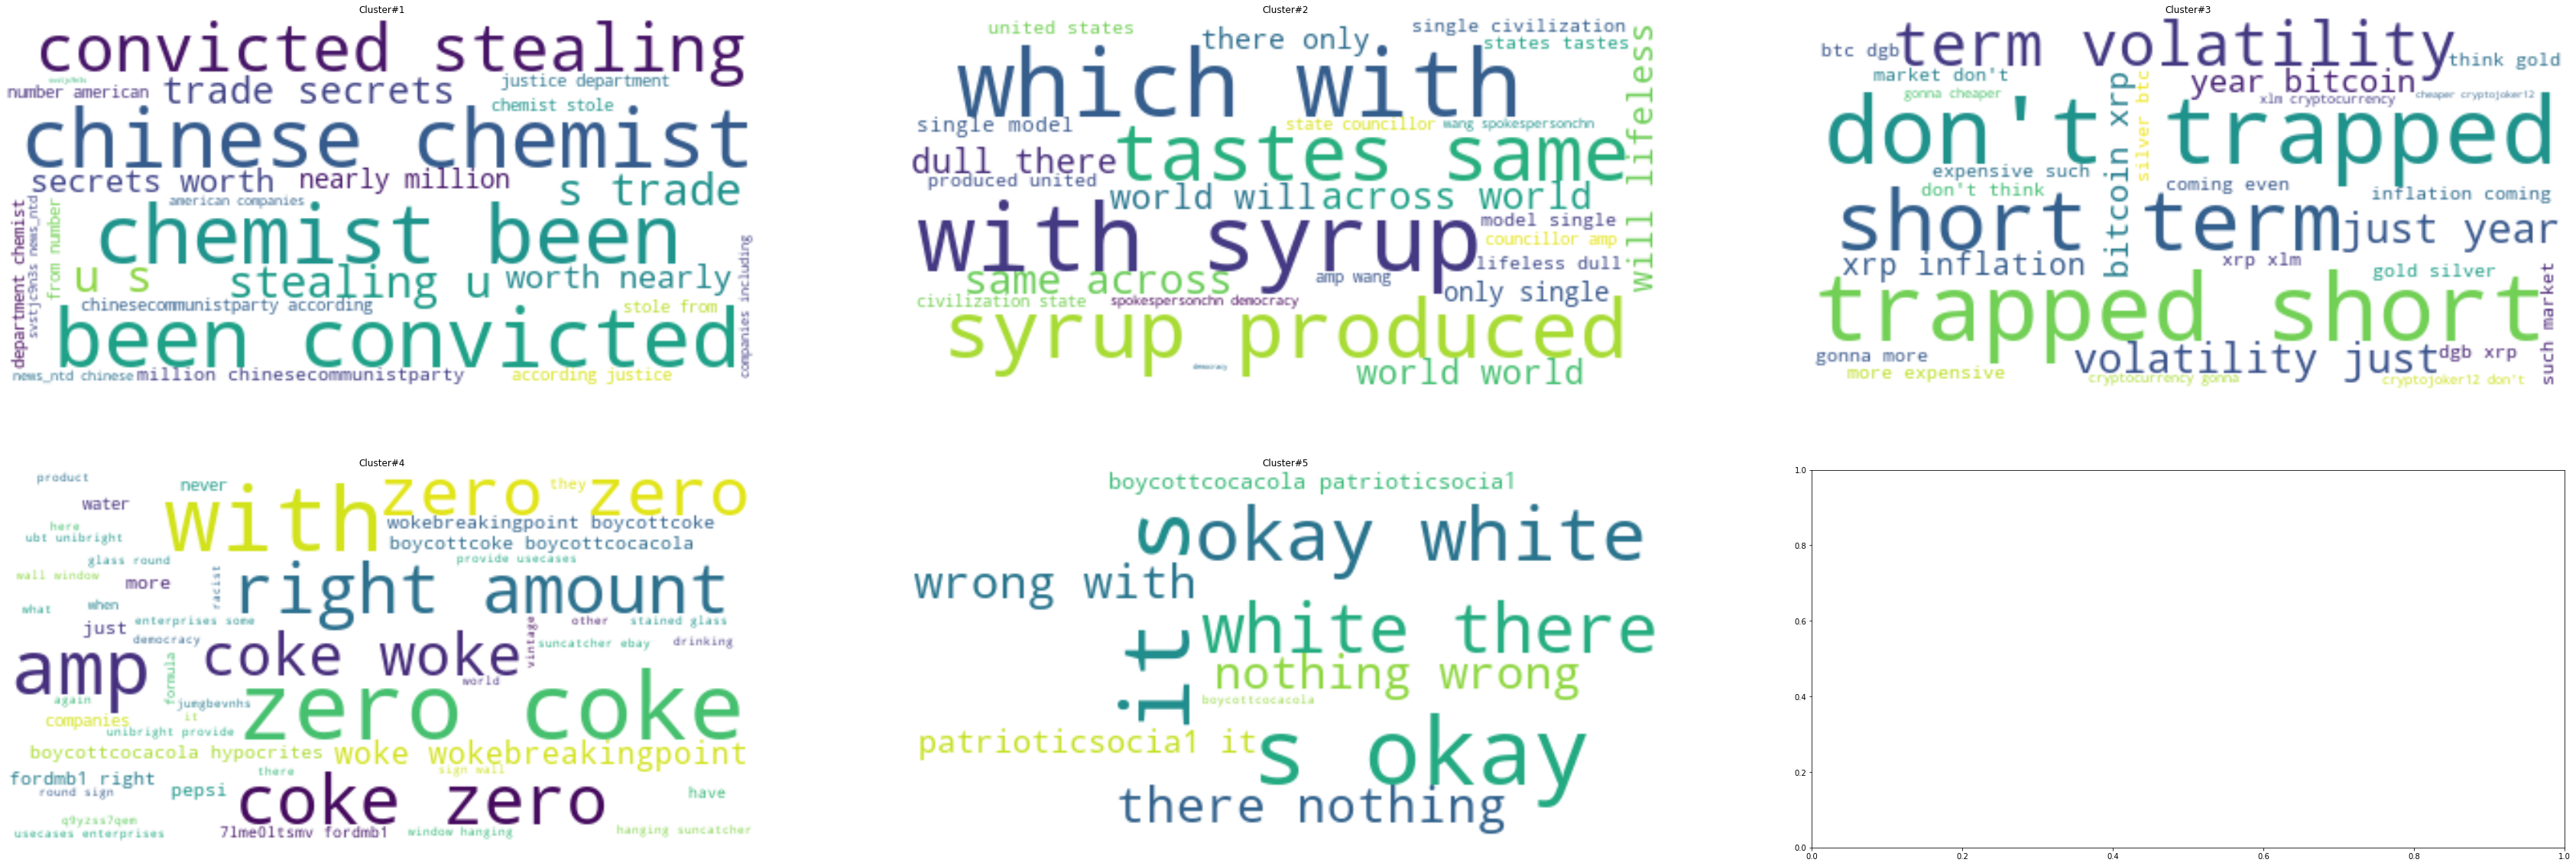

In [8]:
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(60,20))
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
#   print("\n printing S",s)
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that','cocacola','coca','cola']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    #print('Cluster: {}'.format(k))
    #print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    #print(tweets.to_string(index=False))
    plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()

# Using 'Random'

$$ \text{Jaccard Distance = 1 - Jaccard Index}$$

$$ \text{Jaccard Index} = J(A,B) = \frac{|A \cup B|}{A \cp B}$$
$$ \text{Jaccard Index} = J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|}$$
$$ \text{Jaccard Distance} = 1 - J(A,B) = 1 - \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cup B| - |A \cap B|}{|A \cup B|}$$

                                                 tweet  cluster
104  RT @news_ntd : A Chinese chemist has been conv...        0
168  RT @news_ntd : A Chinese chemist has been conv...        0
61   RT @news_ntd : A Chinese chemist has been conv...        0
166  RT @news_ntd : A Chinese chemist has been conv...        0
165  RT @news_ntd : A Chinese chemist has been conv...        0
..                                                 ...      ...
328  RT @CryptoJoker12 : don't be trapped in the sh...        4
329  RT @CryptoJoker12 : don't be trapped in the sh...        4
330  RT @CryptoJoker12 : don't be trapped in the sh...        4
307  RT @CryptoJoker12 : don't be trapped in the sh...        4
227  digitalassetbuy: RT @CryptoJoker12: don't be t...        4

[507 rows x 2 columns]
         tweet
cluster       
0           36
1          276
2           30
3          104
4           61


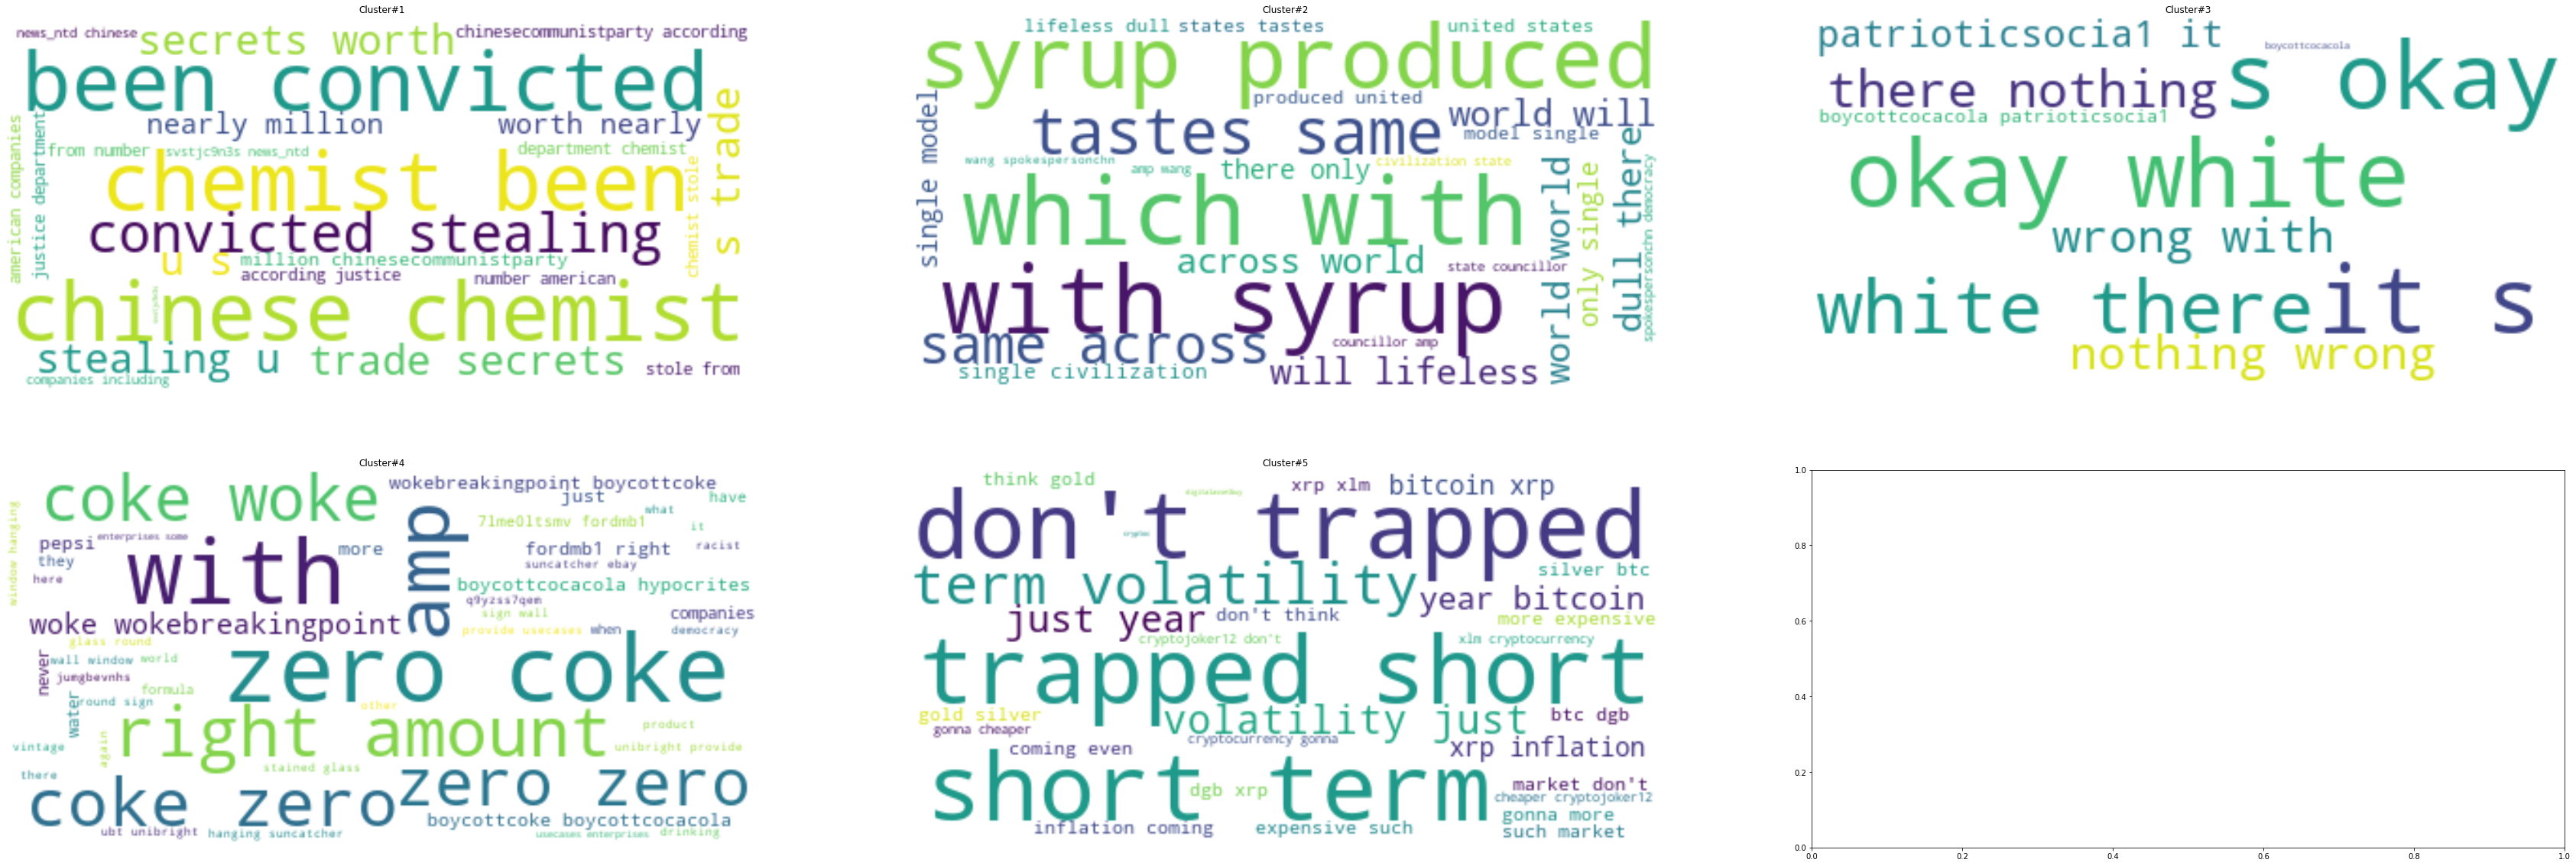

In [9]:
random.seed(22)
idealK = 5
model = KMeans(n_clusters=idealK, init='random', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
tweetClusters=pd.DataFrame(list(zip(tweetList,labels)),columns=['tweet','cluster'])
print(tweetClusters.sort_values(by=['cluster']))
print(tweetClusters.groupby('cluster').count())

#Plotting
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(60,20))
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
#   print("\n printing S",s)
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that','cocacola','coca','cola']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    #print('Cluster: {}'.format(k))
    #print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    #print(tweets.to_string(index=False))
    plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()

## Part 2

c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0

c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128166 missing from current font.
  font.set_text(s, 0, flags=flags)


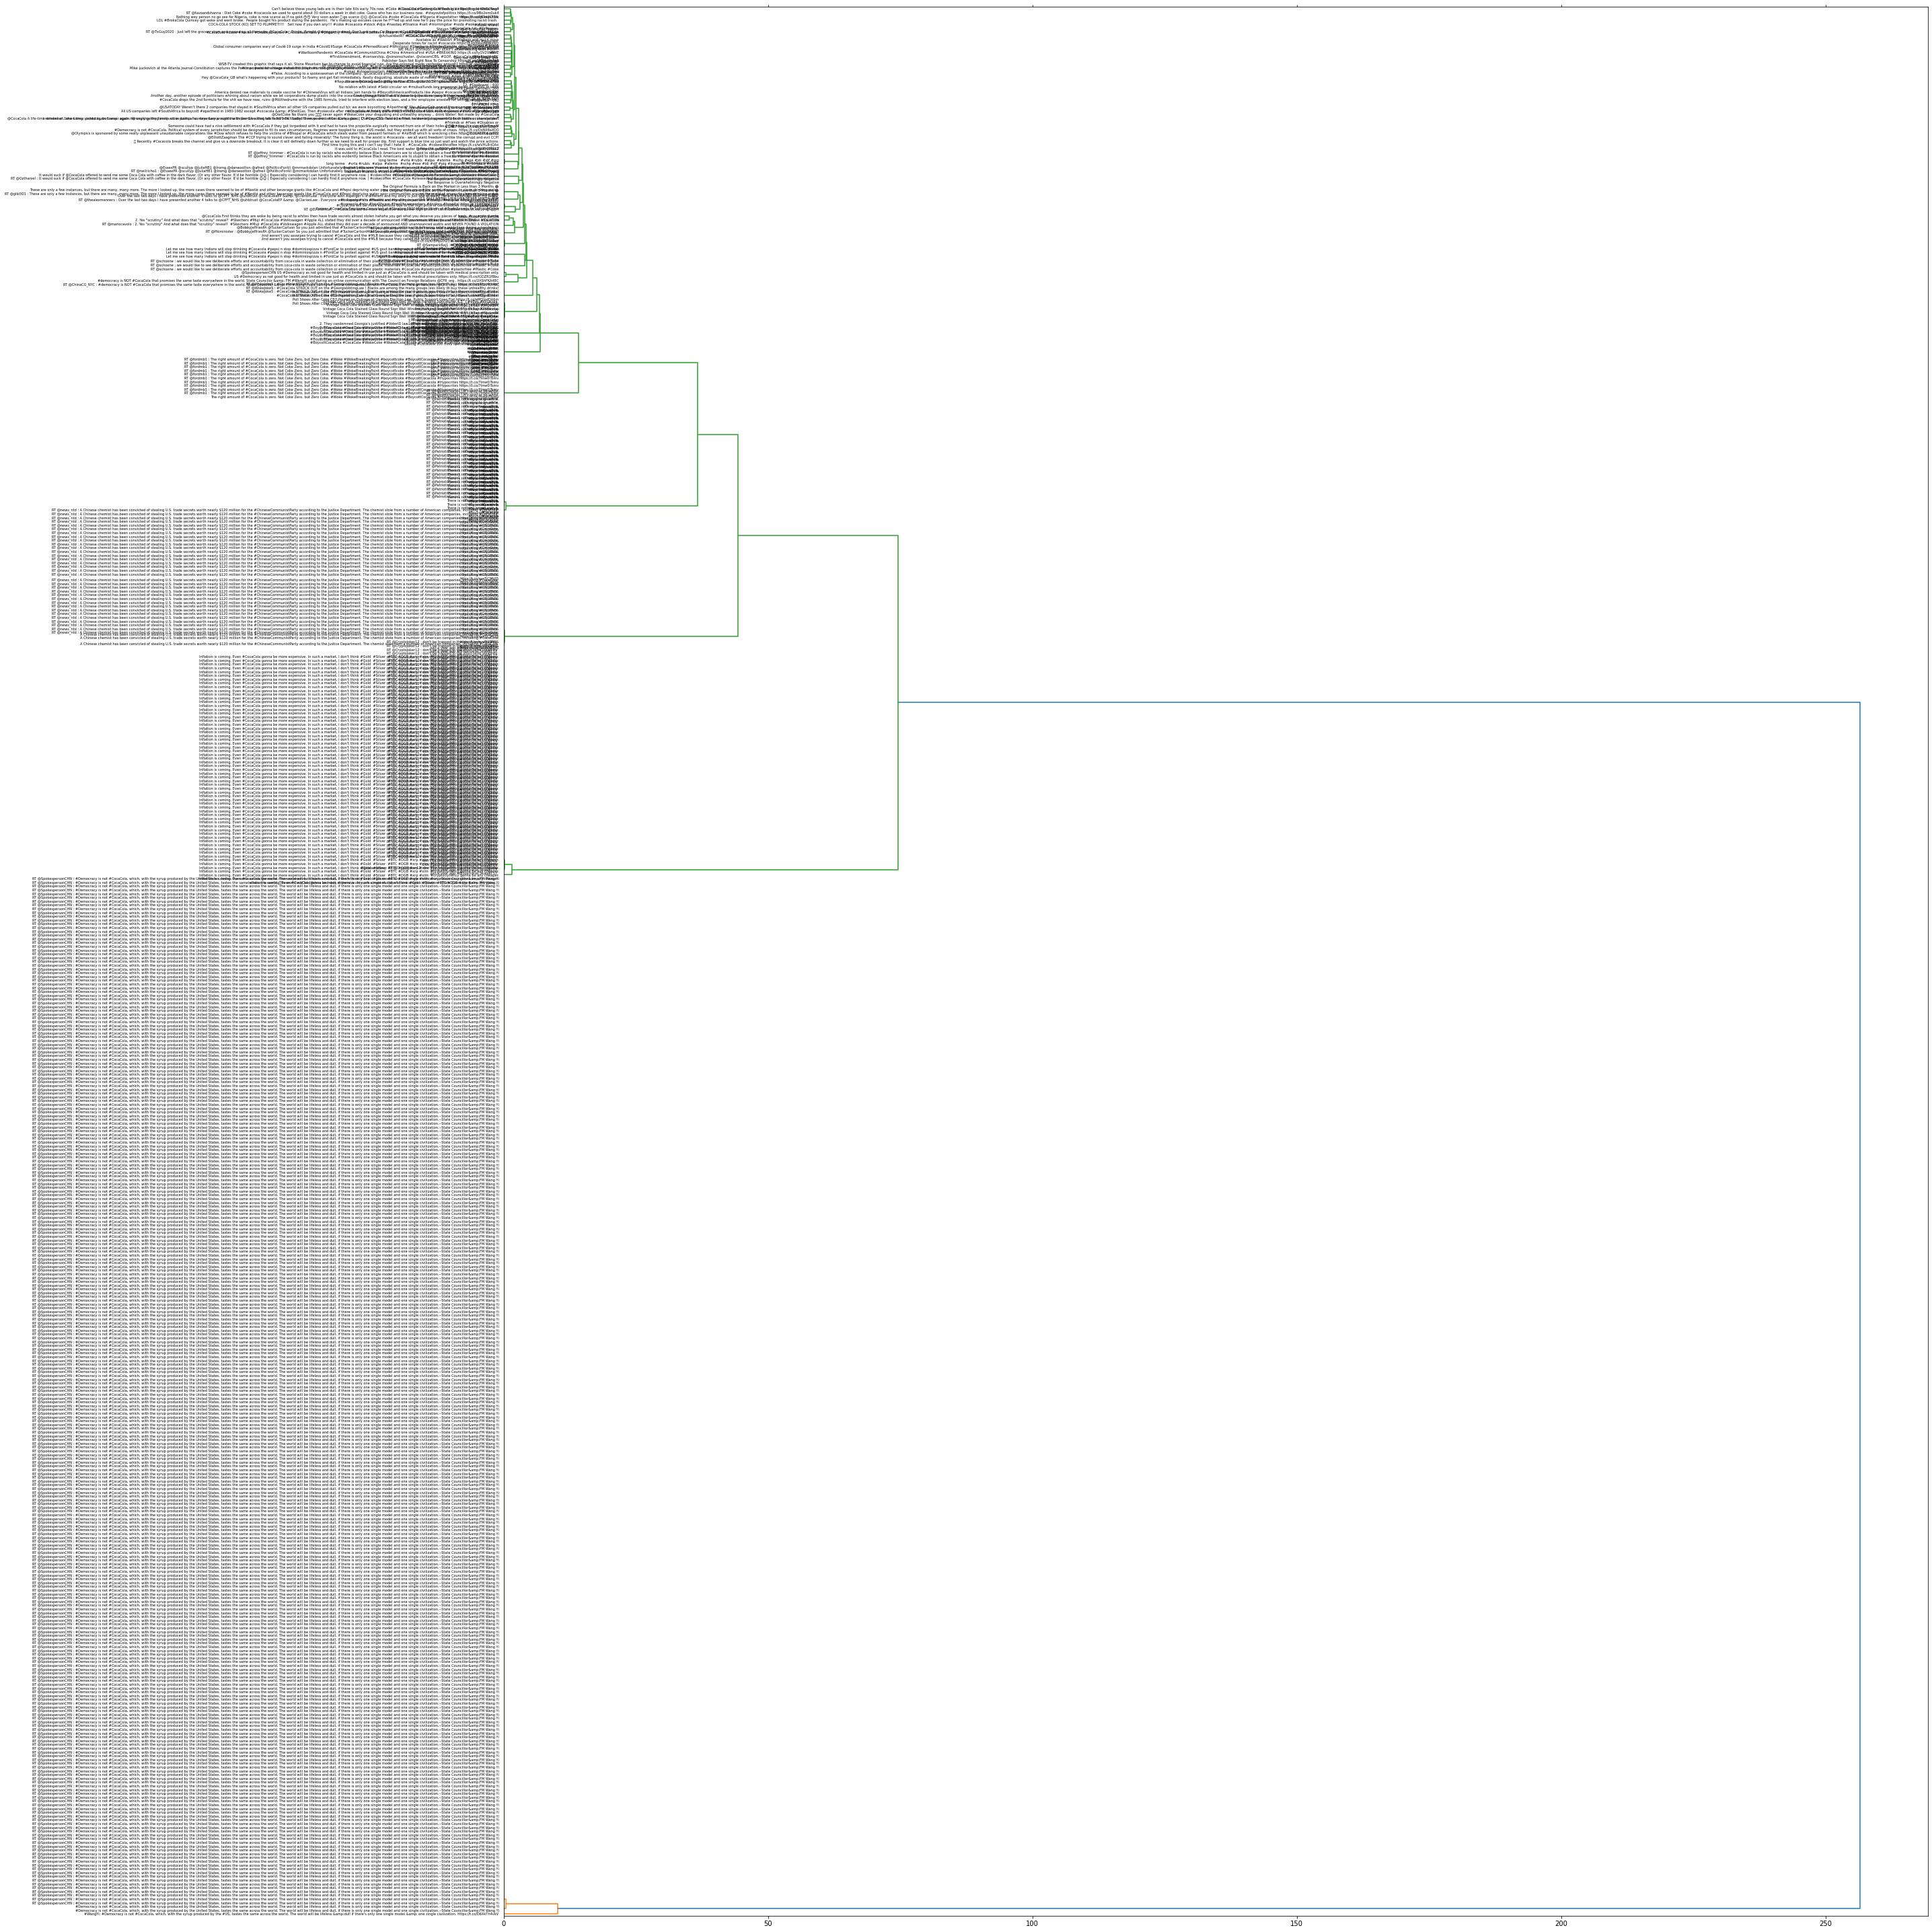

In [10]:
len(vectorizer.get_feature_names())

dist = 1 - cosine_similarity(X)
cosine_similarity(X)
dist


linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(40, 40)) # set size


ax = dendrogram(linkage_matrix, orientation="right", labels=tweetList);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [11]:
tweetClusters[tweetClusters.cluster==0]['tweet']

58     RT @news_ntd : A Chinese chemist has been conv...
60     RT @news_ntd : A Chinese chemist has been conv...
61     RT @news_ntd : A Chinese chemist has been conv...
64     RT @news_ntd : A Chinese chemist has been conv...
65     RT @news_ntd : A Chinese chemist has been conv...
66     RT @news_ntd : A Chinese chemist has been conv...
67     RT @news_ntd : A Chinese chemist has been conv...
68     RT @news_ntd : A Chinese chemist has been conv...
69     RT @news_ntd : A Chinese chemist has been conv...
70     RT @news_ntd : A Chinese chemist has been conv...
71     A Chinese chemist has been convicted of steali...
104    RT @news_ntd : A Chinese chemist has been conv...
105    RT @news_ntd : A Chinese chemist has been conv...
106    RT @news_ntd : A Chinese chemist has been conv...
107    RT @news_ntd : A Chinese chemist has been conv...
108    RT @news_ntd : A Chinese chemist has been conv...
109    RT @news_ntd : A Chinese chemist has been conv...
110    RT @news_ntd : A Chinese